In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data =load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
X,y = data.data, data.target
random_state =0
X_train , X_test , Y_train , Y_test = train_test_split(X,y, random_state =random_state)


In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=random_state)
tree.fit(X_train,Y_train)
tree.score(X_test,Y_test)



0.8811188811188811

In [4]:
n_tree = 50
from sklearn.ensemble import RandomForestClassifier
trees = RandomForestClassifier(n_estimators=n_tree,random_state = random_state)
trees.fit(X_train,Y_train)
trees.score(X_test,Y_test)

0.965034965034965

In [5]:
ensemble_clfs = [
    ('gini',RandomForestClassifier(
      criterion='gini', oob_score=True,random_state=random_state
    )),
    ('entropy',RandomForestClassifier(
       criterion='entropy', oob_score=True,random_state=random_state
    ))
]

min_n_tree = 15
max_n_tree = 150
oob_error_dict=dict()
for label,clf_rf in ensemble_clfs:
    oob_error_list=[]
    for i in range(min_n_tree,max_n_tree+1,5):
        clf_rf.set_params(n_estimators=i)
        clf_rf.fit(X,y)
        oob_error = 1- clf_rf.oob_score_
        oob_error_list.append(oob_error)
    oob_error_dict[label]=oob_error_list
oob_error_dict         


{'gini': [0.05096660808435849,
  0.038664323374341,
  0.03690685413005268,
  0.038664323374341,
  0.03690685413005268,
  0.033391915641476255,
  0.03514938488576447,
  0.033391915641476255,
  0.038664323374341,
  0.03514938488576447,
  0.033391915641476255,
  0.03514938488576447,
  0.033391915641476255,
  0.03163444639718804,
  0.02987697715289983,
  0.03163444639718804,
  0.02987697715289983,
  0.03163444639718804,
  0.03163444639718804,
  0.02987697715289983,
  0.03163444639718804,
  0.03163444639718804,
  0.03163444639718804,
  0.033391915641476255,
  0.03163444639718804,
  0.03163444639718804,
  0.033391915641476255,
  0.033391915641476255],
 'entropy': [0.047451669595782064,
  0.05096660808435849,
  0.04393673110720564,
  0.040421792618629215,
  0.04217926186291743,
  0.03690685413005268,
  0.033391915641476255,
  0.03514938488576447,
  0.038664323374341,
  0.033391915641476255,
  0.033391915641476255,
  0.02987697715289983,
  0.033391915641476255,
  0.03163444639718804,
  0.03514

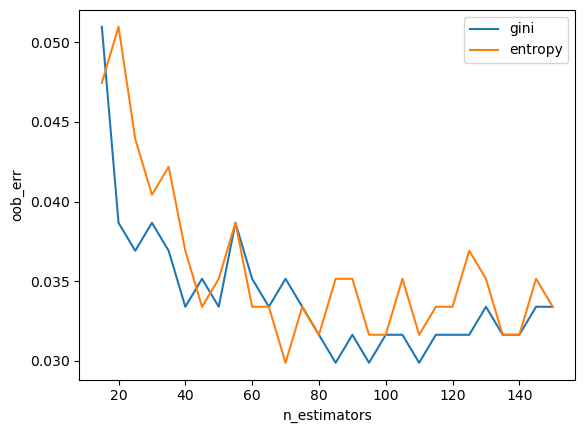

In [6]:
import matplotlib.pyplot as plt
for label, clf_err in oob_error_dict.items():
    x=range(min_n_tree,max_n_tree+1,5)
    plt.plot(x,clf_err,label = label)
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('oob_err')
plt.show()    


In [7]:
trees.feature_importances_

array([0.01813132, 0.01630077, 0.02360326, 0.0483191 , 0.01144435,
       0.0059902 , 0.03782839, 0.11027464, 0.00868753, 0.00324543,
       0.04524386, 0.00573833, 0.02002138, 0.03316923, 0.00344682,
       0.00277682, 0.00548205, 0.00574465, 0.00433829, 0.00536753,
       0.0950842 , 0.01617893, 0.16177264, 0.0758077 , 0.01420115,
       0.00991097, 0.04000221, 0.15676058, 0.00706452, 0.00806314])

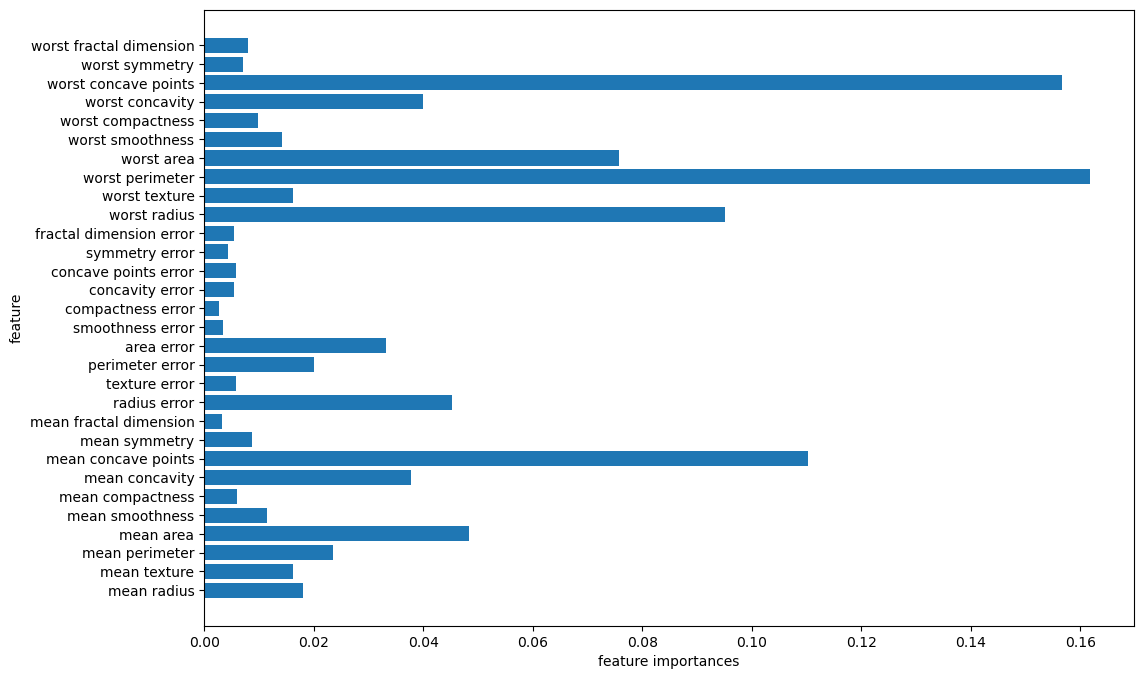

In [8]:
n_feature = X.shape[1]
n_feature
plt.figure(figsize=(12,8))
plt.barh(range(n_feature),width= trees.feature_importances_)
plt.yticks(range(n_feature),data.feature_names)
plt.ylabel('feature')
plt.xlabel('feature importances')
plt.show()

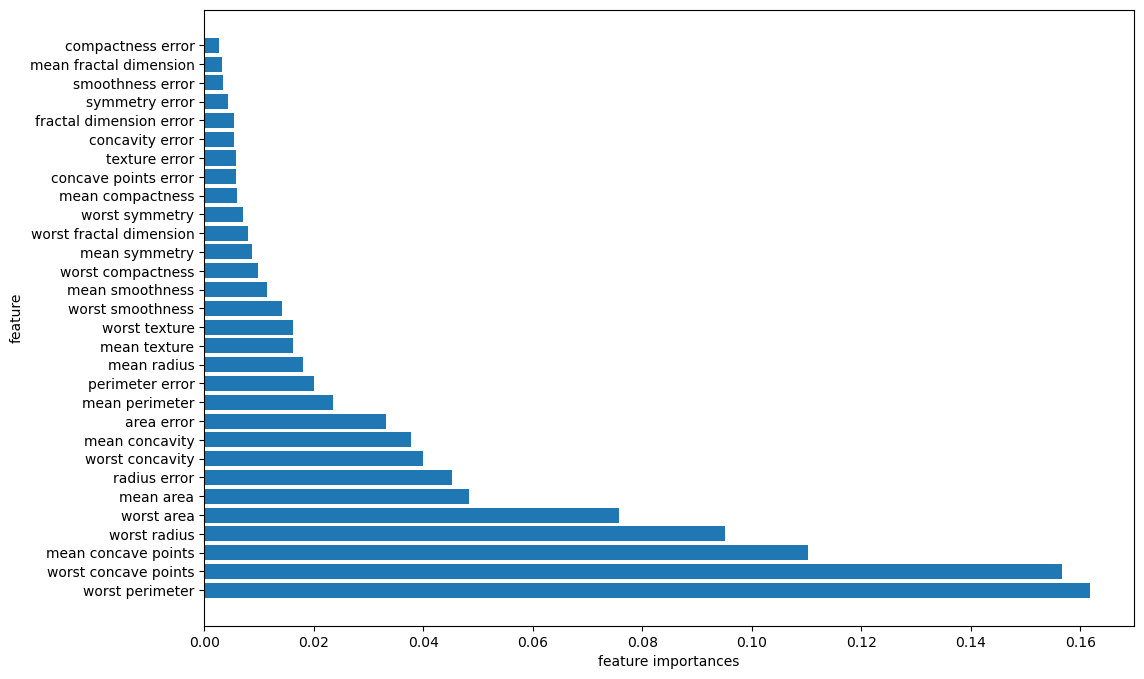

In [9]:
n_feature = X.shape[1]
n_feature
plt.figure(figsize=(12,8))
sorted_idx = trees.feature_importances_.argsort()[::-1]
plt.barh(range(n_feature),width=trees.feature_importances_[sorted_idx])
plt.yticks(range(n_feature),data.feature_names[sorted_idx])
plt.ylabel('feature')
plt.xlabel('feature importances')
plt.show()

In [10]:
import numpy as np
sort_feature = np.sort(trees.feature_importances_)
sort_index = np.argsort(trees.feature_importances_)


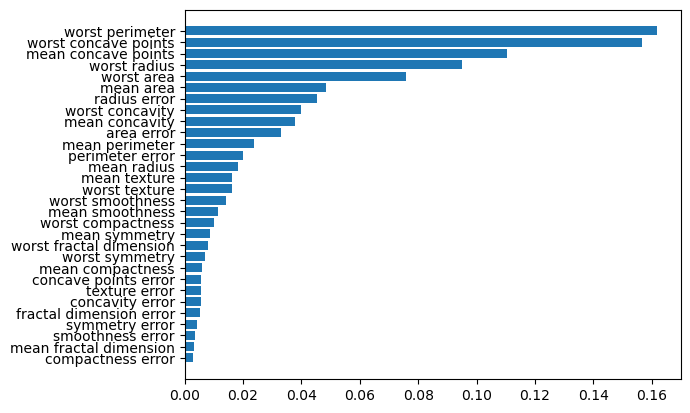

In [11]:
plt.barh(range(n_feature),sort_feature)
plt.yticks(range(n_feature),data.feature_names[sort_index])
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

clf_rf = RandomForestClassifier(n_estimators = n_tree, random_state=random_state)
clf_ada = AdaBoostClassifier(n_estimators = n_tree, random_state=random_state)
clf_GBDT = GradientBoostingClassifier(n_estimators = n_tree, random_state=random_state)
clf_xgboost = XGBClassifier(n_estimators = n_tree, random_state=random_state)

In [13]:
from mlxtend.evaluate import bias_variance_decomp
mse_rf, bias_rf, var_rf = bias_variance_decomp(clf_rf,X_train,Y_train,X_test,Y_test,loss='mse',random_seed = 0,num_rounds = 5)

In [14]:
mse_ada, bias_ada, var_ada = bias_variance_decomp(clf_ada,X_train,Y_train,X_test,Y_test,loss='mse',random_seed = 0,num_rounds = 5)

In [15]:
mse_GBDT, bias_GBDT, var_GBDT = bias_variance_decomp(clf_GBDT,X_train,Y_train,X_test,Y_test,loss='mse',random_seed = 0,num_rounds = 5)

In [16]:
mse_xgboost, bias_xgboost, var_xgboost = bias_variance_decomp(clf_xgboost,X_train,Y_train,X_test,Y_test,loss='mse',random_seed = 0,num_rounds = 5)

In [17]:
data = [[mse_rf, bias_rf, var_rf],[mse_ada, bias_ada, var_ada],[mse_GBDT, bias_GBDT, var_GBDT],[mse_xgboost, bias_xgboost, var_xgboost]]
data

[[0.04755244755244755, 0.03076923076923077, 0.016783216783216787],
 [0.04195804195804197, 0.018461538461538467, 0.023496503496503496],
 [0.048951048951048945, 0.02433566433566434, 0.02461538461538462],
 [0.03776223776223776, 0.016503496503496504, 0.021258741258741262]]

In [18]:
import pandas as pd
pd.DataFrame(data = data, index = ['rf','ada','GBDT','xgboost'],columns=['mse','bias','var'])

,mse,bias,var
rf,0.047552,0.030769,0.016783
ada,0.041958,0.018462,0.023497
GBDT,0.048951,0.024336,0.024615
xgboost,0.037762,0.016503,0.021259
